In [ ]:
from numpy import integer
import pandas as pd
from sklearn.preprocessing import LabelEncoder
S=pd.Series(["manager","junior","junior","manager","senior","manager","senior","senior","junior","manager","senior","manager","senior","senior","junior","manager","junior","junior","manager","senior"])
le=LabelEncoder()
encode=le.fit_transform(S)
print(encode)
print(pd.get_dummies(S,dtype=integer))

[1 0 0 1 2 1 2 2 0 1 2 1 2 2 0 1 0 0 1 2]
    junior  manager  senior
0        0        1       0
1        1        0       0
2        1        0       0
3        0        1       0
4        0        0       1
5        0        1       0
6        0        0       1
7        0        0       1
8        1        0       0
9        0        1       0
10       0        0       1
11       0        1       0
12       0        0       1
13       0        0       1
14       1        0       0
15       0        1       0
16       1        0       0
17       1        0       0
18       0        1       0
19       0        0       1


/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  npdtype = np.dtype(dtype)


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
loan=pd.read_csv('/content/loan_approved.csv')
loan

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
loan.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True) # categorical nominal
loan['Married'].fillna(loan['Married'].mode()[0],inplace=True) #categorical nominal
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace=True) # categorical ordinal

/tmp/ipython-input-440487417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True) # categorical nominal
/tmp/ipython-input-440487417.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [ ]:
loan.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
loan['LoanAmount'].unique() #numerical continuous

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [ ]:
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace=True)
loan['LoanAmount'].fillna(loan['LoanAmount'].median(),inplace=True)
loan.isnull().sum()

/tmp/ipython-input-1169084339.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace=True)
/tmp/ipython-input-1169084339.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


In [ ]:
print(loan['Loan_Amount_Term'].unique()) #numerical discrete
loan.fillna({"Loan_Amount_Term":loan['Loan_Amount_Term'].mode()[0]},inplace=True)
loan.fillna({"Credit_History":loan['Credit_History'].mode()[0]},inplace=True)# categorical
loan.isnull().sum()

[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le=LabelEncoder()

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#nominal loan_id to numerical encoding
#these ids are not relevent in machine learning
loan['Loan_ID'].nunique() #all are unique doesnot impact on prediction

614

In [ ]:
#gender and married can use labelencoder or onehotencoder
loan['Gender']=pd.get_dummies(loan['Gender'],dtype=integer,drop_first=True)
loan['Married']=pd.get_dummies(loan['Married'],dtype=integer,drop_first=True)# only 2 categories so drop_first is used to remove one category

/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  npdtype = np.dtype(dtype)
/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  npdtype = np.dtype(dtype)


In [ ]:
#dependents is categorical(values=0,1,2,3+)
#use onehotencoder since it is ordinal with order
en_dep=le.fit_transform(loan['Dependents'])
print(en_dep)
onehot=OneHotEncoder(sparse_output=False)
loan['Dependents']=onehot.fit_transform(loan[['Dependents']])


[1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0
 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1
 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0
 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1
 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 1 1 0 1 

In [ ]:
loan['Loan_Amount_Term'].mode()[0] # discrete data or categorical data is preferred to use mode

np.float64(360.0)

In [ ]:
loan['Education']=le.fit_transform(loan['Education'])

In [ ]:
loan['Self_Employed']=le.fit_transform(loan['Self_Employed'])


In [ ]:
loan['Property_Area']=onehot.fit_transform(loan[['Property_Area']])

In [ ]:
loan['Loan_Status (Approved)']=le.fit_transform(loan['Loan_Status (Approved)'])

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    int64  
 2   Married                 614 non-null    int64  
 3   Dependents              614 non-null    float64
 4   Education               614 non-null    int64  
 5   Self_Employed           614 non-null    int64  
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              614 non-null    float64
 9   Loan_Amount_Term        614 non-null    float64
 10  Credit_History          614 non-null    float64
 11  Property_Area           614 non-null    float64
 12  Loan_Status (Approved)  614 non-null    int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 62.5+ KB


In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,0.0,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,1.0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,0.0,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,0.0,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,0.0,1


In [ ]:
loan.to_csv("encoded_loans.csv")

In [ ]:
s=((loan['ApplicantIncome']-loan['ApplicantIncome'].mean())/loan['ApplicantIncome'].std())#zscore
s.max()

12.374533479765521

In [ ]:
outlier=[]
for i in s:
  if i<-3 or i>3:
    outlier.append(i)

len(outlier)

8

In [ ]:
loan['CoapplicantIncome'].skew()

np.float64(7.491531216657306)

In [ ]:
loan['CoapplicantIncome'].kurtosis()


np.float64(84.95638421103374)

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

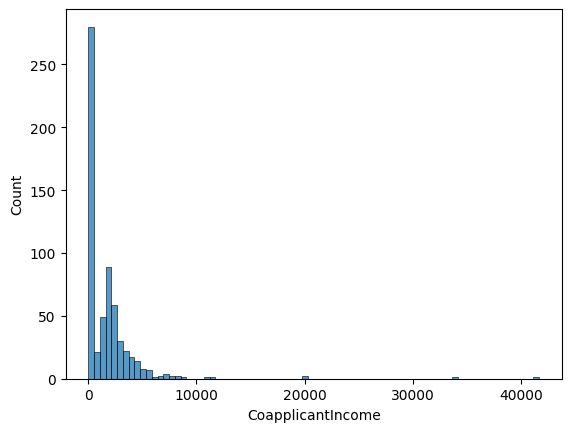

In [ ]:
sns.histplot(data=loan['CoapplicantIncome'])

In [ ]:
from sklearn.preprocessing import PowerTransformer
trans=PowerTransformer(method='yeo-johnson')
la_trans=trans.fit_transform(loan[['CoapplicantIncome']])
la_trans.shape
print("skewness:",pd.Series(la_trans.reshape(614,)).skew())
print("kurtosis:",pd.Series(la_trans.reshape(614,)).kurtosis())


skewness: -0.14564645710551902
kurtosis: -1.8778432766544493


<Axes: ylabel='Count'>

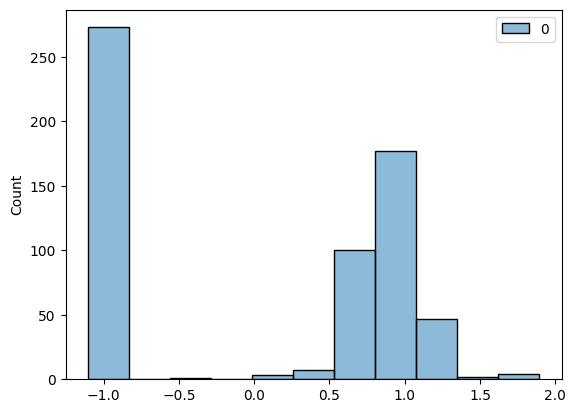

In [ ]:
import seaborn as sns
sns.histplot(data=la_trans)